In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

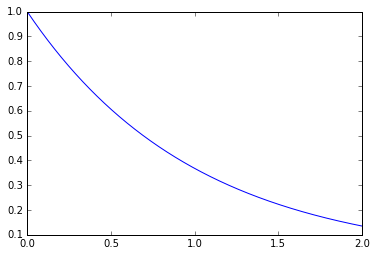

In [3]:
np.random.seed(42)
xs = np.linspace(0, 2, 10000)
speeds_xs = np.exp(-xs)
plt.plot(xs, speeds_xs)
plt.show()

In [6]:
CUTOFF_SPEED = 0.3
NB_EPOCHS = 1000

In [7]:
# For example if we have 0.9, we want the network to understand that:
# exp(-x) = 0.9
# x = -log(0.9) => 0.105
# cutoff is 0.3. So x_cutoff = 1.203
# result = 1.203 - 0.105 = 1.098
# Function to approximate is then:
# INPUT: 0.9, F(X) = log(X) - log(0.3)

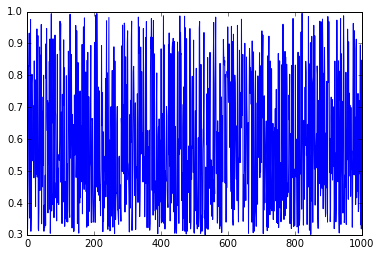

In [8]:
x_inputs = np.random.uniform(low=0, high=-np.log(CUTOFF_SPEED), size=(1000,))
inputs = np.exp(-x_inputs)
inputs[1:10]
plt.plot(inputs)

In [9]:
def f(x):
    return np.log(x) - np.log(CUTOFF_SPEED)

In [10]:
def g(x):
    return np.exp(-x)

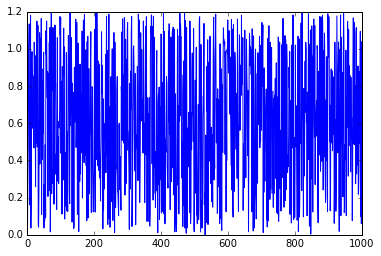

In [11]:
outputs = f(inputs)
outputs[1:10]
plt.plot(outputs)

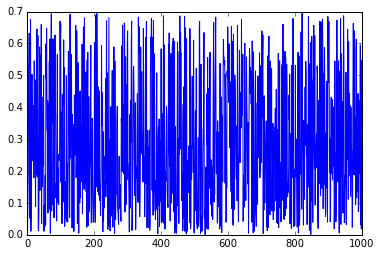

In [12]:
from scipy.integrate import quad
dists = []
for xmin in x_inputs:
    dists.append(quad(g, xmin, -np.log(CUTOFF_SPEED)))
plt.plot(dists)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(10, input_shape=(1,), activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss='mse', optimizer='sgd')

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_4 (Dense)                  (None, 10)            20          dense_input_2[0][0]              
____________________________________________________________________________________________________
dense_5 (Dense)                  (None, 10)            110         dense_4[0][0]                    
____________________________________________________________________________________________________
dense_6 (Dense)                  (None, 1)             11          dense_5[0][0]                    
Total params: 141
____________________________________________________________________________________________________


In [ ]:
train_loss = []
for epoch in range(NB_EPOCHS / 10):
    model.fit(inputs, outputs,
              batch_size=1, nb_epoch=10,
              verbose=0, validation_data=(inputs, outputs))
    train_loss.append(model.evaluate(inputs, outputs))

  32/1000 [..............................] - ETA: 0s

In [ ]:
plt.plot(train_loss)